### Phân tích bệnh đái tháo đường

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Định nghĩa vấn đề

+ Bệnh tiểu đường (Diabetes Mellitus) là một căn bệnh mãn tính ảnh hưởng đến hàng triệu người trên thế giới. Việc chẩn đoán sớm và chính xác có ý nghĩa quan trọng trong phòng ngừa biến chứng và cải thiện chất lượng cuộc sống bệnh nhân.

+ Trong đề tài này, chúng ta sử dụng bộ dữ liệu Pima Indians Diabetes do Viện Quốc gia về Bệnh tiểu đường, Tiêu hóa và Bệnh thận (National Institute of Diabetes and Digestive and Kidney Diseases - NIDDK) cung cấp. Bộ dữ liệu bao gồm thông tin y tế của phụ nữ người da đỏ Pima từ 21 tuổi trở lên, với các thuộc tính lâm sàng như: số lần mang thai, nồng độ glucose, huyết áp, độ dày da, insulin, chỉ số BMI, tuổi, v.v.

# Mục tiêu của vấn đề:

+ Xây dựng mô hình phân loại nhị phân để dự đoán xem một bệnh nhân có khả năng mắc bệnh tiểu đường (1) hay không (0) dựa trên các đặc trưng y tế.

# Ý nghĩa thực tiễn:

+ Hỗ trợ bác sĩ trong việc chẩn đoán sớm nguy cơ mắc tiểu đường.

+ Giúp tiết kiệm chi phí và thời gian trong chăm sóc sức khỏe.

+ Tạo nền tảng cho việc phát triển các hệ thống hỗ trợ ra quyết định y tế thông minh.

## 2. Chuẩn bị vấn đề ( Prepare Problem)

### 2.1 Khai báo thư viện ( Load Libraries )

In [2]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

## 2.2 Nạp dữ liệu ( Load Dataset )

In [3]:


# Đường dẫn file dữ liệu
data_path = "pima-indians-diabetes.data.csv"

# Tên các cột trong dataset
data_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"
]

# Đọc dữ liệu vào DataFrame
df_dataset = pd.read_csv(data_path, names=data_names)

# Hiển thị kích thước và 5 dòng đầu
print("Kích thước dữ liệu:", df_dataset.shape)
print(df_dataset.head())


Kích thước dữ liệu: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  


## 3. Phân tích dữ liệu (Analyze Data)

## 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [4]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies           int64
Glucose               int64
BloodPressure         int64
SkinThickness         int64
Insulin               int64
BMI                 float64
DiabetesPedigree    float64
Age                   int64
Outcome               int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Dữ liệu có 8 thuộc tính đầu vào để phân lớp: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigree, Age.

+ Các giá trị đều ở dạng số học (int/float), nhưng không cùng đơn vị đo (ví dụ: Glucose tính bằng mg/dl, Huyết áp mmHg, BMI kg/m², Tuổi tính theo năm).

+ Tổng số dòng dữ liệu là 768 dòng.

+ Nhãn phân lớp nằm ở cột Outcome (giá trị 0 = không mắc tiểu đường, 1 = mắc tiểu đường).

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [5]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


 Nhận xét
+ Dữ liệu không có giá trị trùng
+ Dữ liệu không có giá trị rỗng ( NaN, Null )


**Nhận xét**:
+ Dữ liệu có 3 dòng bị trùng là dòng ở vị trí 34, 37, 142
+ Dữ liệu không có giá trị rỗng (NaN, Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [6]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Nhận xét
+ Pregnancies: Trung bình bệnh nhân mang thai khoảng 3–4 lần, tối đa là 17 lần.

+ Glucose: Giá trị trung bình 120.9, có nhiều giá trị bằng 0 (không hợp lý trong y tế, nên xem như giá trị thiếu).

+ BloodPressure: Trung bình 69 mmHg, nhưng giá trị nhỏ nhất bằng 0 ⇒ không thực tế.

+ SkinThickness: Trung bình khoảng 20 mm, nhưng nhiều giá trị bằng 0 ⇒ coi là thiếu dữ liệu.

+ Insulin: Dao động lớn (0 đến 846), độ lệch chuẩn cao (115) ⇒ có nhiều ngoại lai và giá trị 0 không hợp lý.

+ BMI: Trung bình 31.99, min bằng 0 ⇒ bất thường (vì BMI = 0 là không có thật).

+ DiabetesPedigree: Trung bình 0.47, cho biết hệ số di truyền tiểu đường, giá trị tối đa 2.42 ⇒ có sự chênh lệch nhưng không quá cực đoan.

+ Age: Tuổi trung bình 33, nhỏ nhất 21, lớn nhất 81 ⇒ phù hợp với đối tượng nghiên cứu.

+ Outcome: Tỉ lệ mắc tiểu đường khoảng 34.9%, còn lại 65.1% không mắc ⇒ dữ liệu hơi mất cân bằng lớp (nhiều mẫu không mắc hơn).


#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [7]:
# Số lượng và tỉ lệ phần trăm
print(df_dataset["Outcome"].value_counts())
print(df_dataset["Outcome"].value_counts(normalize=True) * 100)


Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


Nhận xét
+ Dữ liệu được chia thành hai lớp:

+ 0 = không mắc tiểu đường.

+ 1 = mắc tiểu đường.

+ Tỉ lệ phân bố không cân bằng hoàn toàn: lớp 0 chiếm nhiều hơn lớp 1.

+ Tuy nhiên mức chênh lệch (~65% so với 35%) vẫn chấp nhận được để huấn luyện mô hình học máy.

+ Cần lưu ý khi đánh giá mô hình, không chỉ dùng Accuracy, mà nên sử dụng thêm Precision, Recall, F1-score để đảm bảo đo lường tốt hiệu quả dự đoán cho cả hai lớp.

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

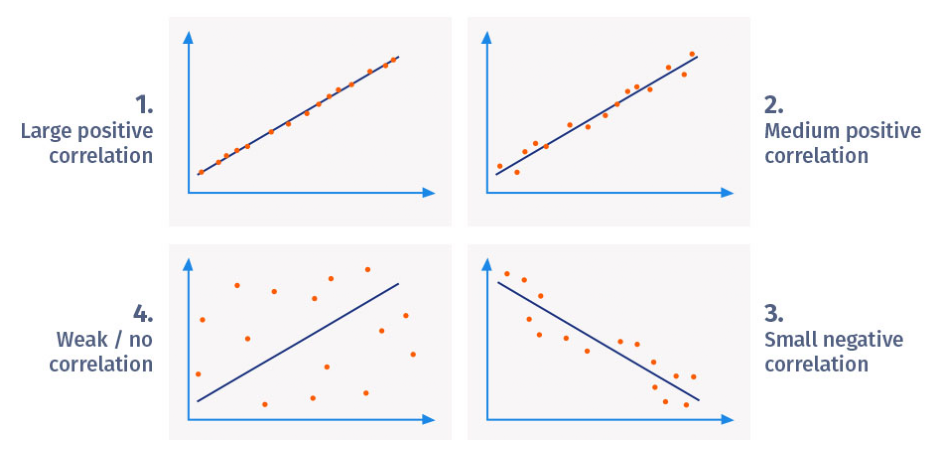

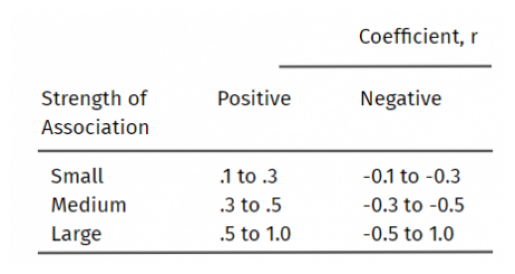

In [8]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("corr2.png")), plt.axis("off"), plt.show();

In [9]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Nhận xét
+ Sepal-length và Petal-length (0.87), Sepal-length và Petal-width (0.82):
→ Có tương quan dương rất mạnh, tức là khi chiều dài đài hoa (sepal) tăng thì chiều dài và chiều rộng cánh hoa (petal) cũng tăng.

+ Petal-length và Petal-width (0.96):
→ Đây là mối tương quan mạnh nhất, gần như tuyến tính hoàn toàn. Nghĩa là nếu biết chiều dài cánh hoa thì có thể dự đoán được chiều rộng cánh hoa với độ chính xác rất cao.

 Sepal-width và các biến khác:

+ Với Sepal-length: (-0.11) → gần như không tương quan.

+ Với Petal-length: (-0.42), với Petal-width: (-0.36) → có tương quan âm trung bình, nghĩa là khi chiều rộng đài hoa tăng thì cánh hoa có xu hướng nhỏ đi.

Ý nghĩa tổng quan:

+ Sepal-length và Sepal-width không liên hệ chặt chẽ với nhau.

+ Petal-length và Petal-width mang thông tin rất giống nhau (multicollinearity cao).

=> Đặc trưng Petal (cánh hoa) có mối quan hệ mạnh hơn nhiều so với Sepal, và chúng thường được dùng để phân loại loài hoa tốt hơn.

### 3.2. Hiển thị dữ liệu (Visualize Data)


#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

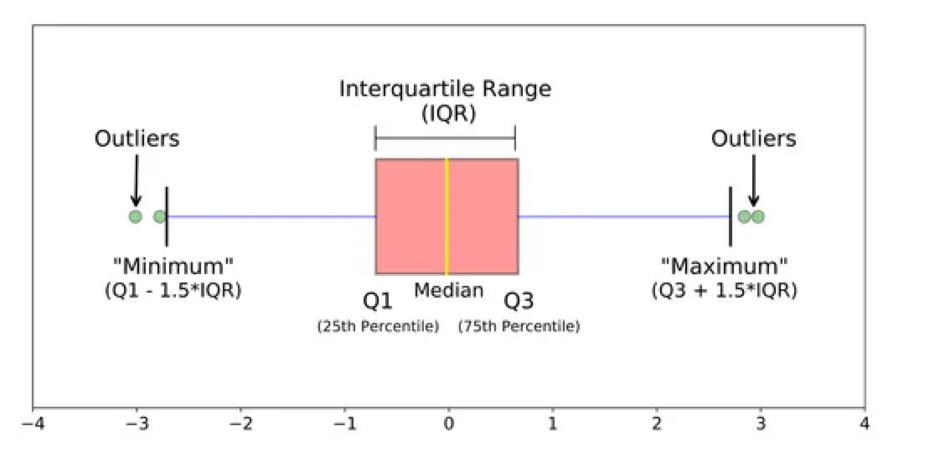

In [10]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("boxplots.png")), plt.axis("off"), plt.show();

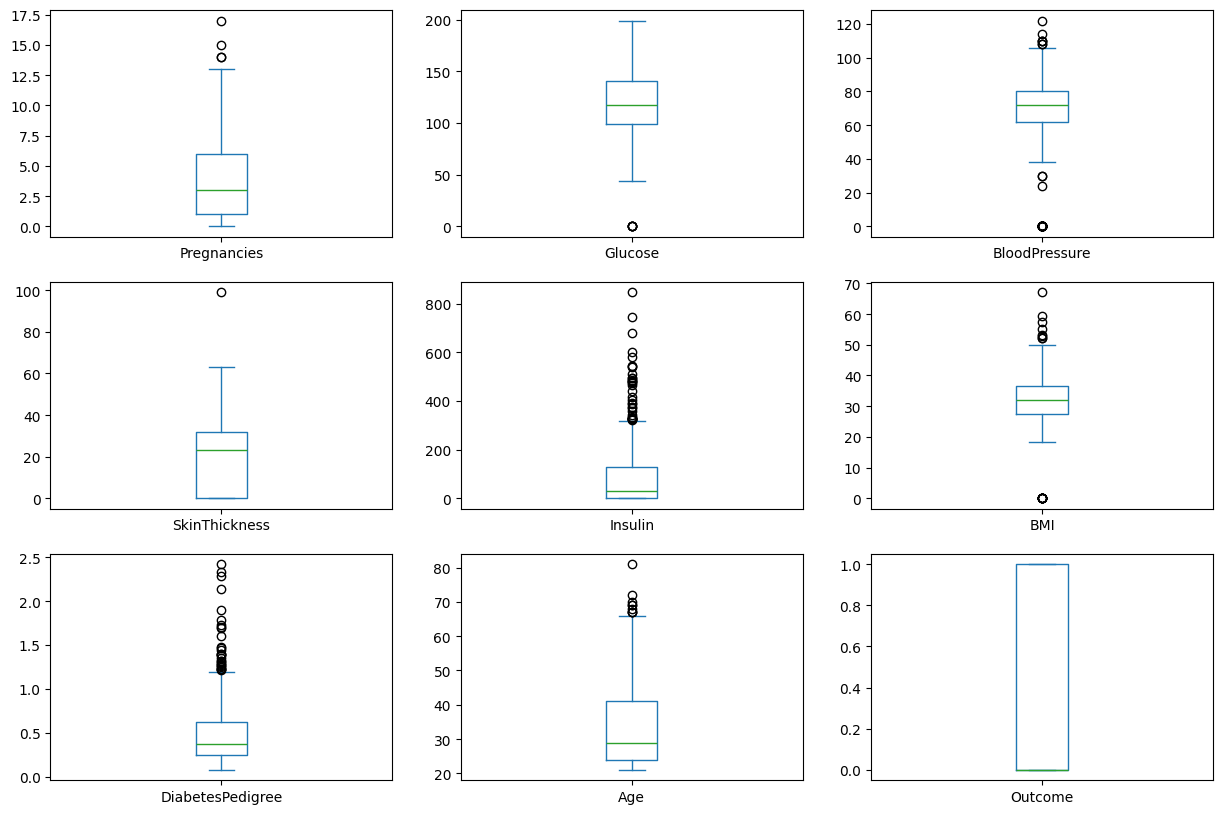

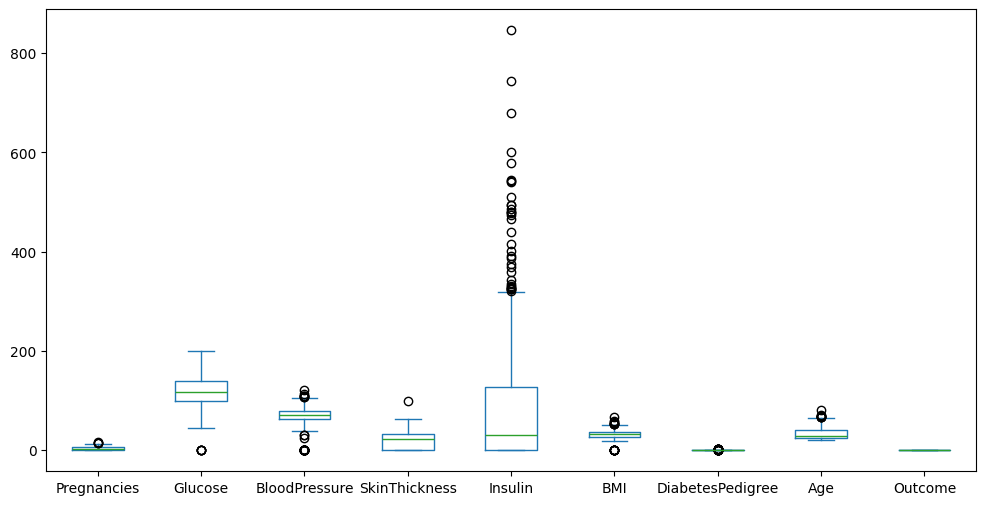

In [11]:
df_dataset.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(15,10));
df_dataset.plot(kind="box", figsize=(12,6));

**Nhận xét**:
+ Độ trải rộng giữa các tính chất khá khác nhau (sepal-width, sepal-length, petal-width, petal-length)
+ Độ lệch của sepal-length, petal-length, petal-width theo hướng giá trị nhỏ.
+ Phân bố giá trị của sepal-width khá cân bằng

**Biểu đồ Histogram**

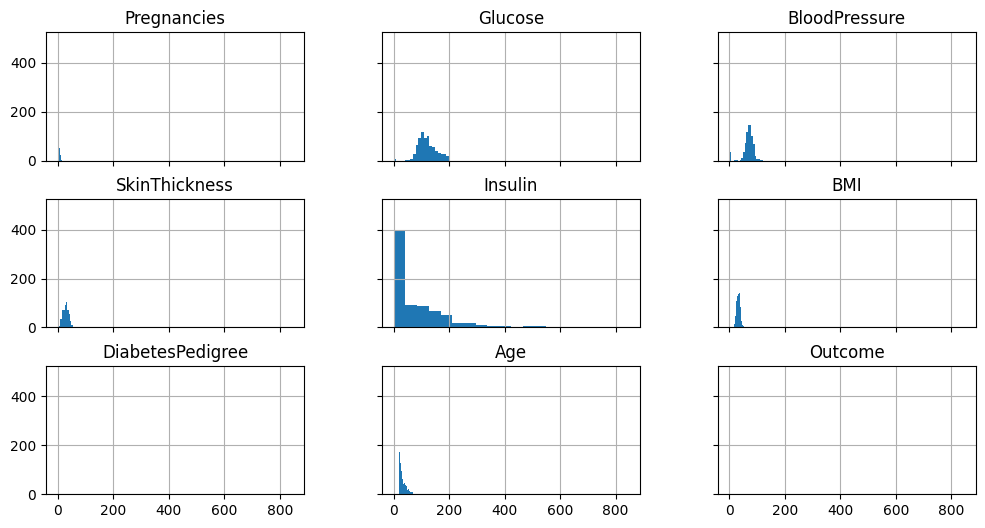

In [12]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

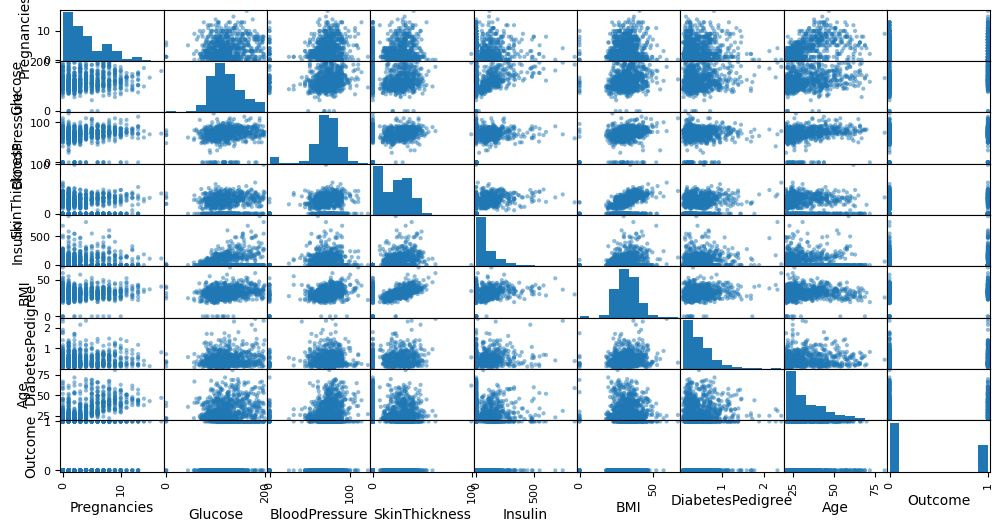

In [13]:
pd.plotting.scatter_matrix(df_dataset, figsize=(12,6));

Glucose và BMI là yếu tố then chốt trong chẩn đoán tiểu đường.

Age, Pregnancies cũng có ảnh hưởng đáng kể.

SkinThickness, Insulin cần xử lý lại dữ liệu.

<Figure size 800x600 with 0 Axes>

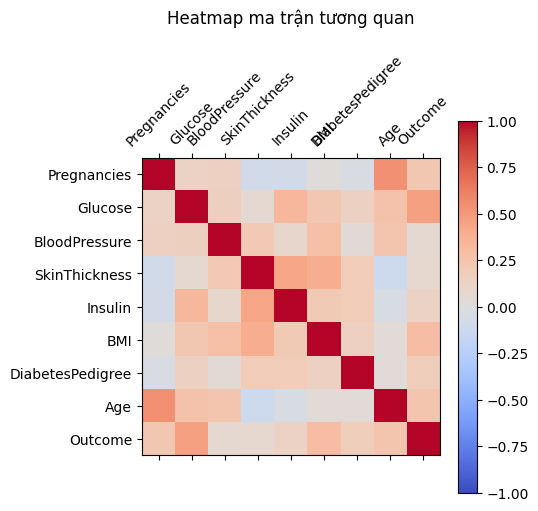

In [14]:

# Tính ma trận tương quan
correlations = df_dataset.corr()

# Vẽ heatmap bằng matshow
plt.figure(figsize=(8,6))
cax = plt.matshow(correlations, vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar(cax)

# Tạo ticks khớp với số lượng cột
ticks = np.arange(len(correlations.columns))
plt.xticks(ticks, correlations.columns, rotation=45)
plt.yticks(ticks, correlations.columns)

plt.title("Heatmap ma trận tương quan", pad=20)
plt.show()


## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [15]:
df_clean = df_dataset.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [16]:
display.display(df_dataset[df_dataset.duplicated()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome


In [17]:

# Query 1: phụ nữ có 6 lần mang thai, Glucose = 148, Outcome = 1
s_query1 = "Pregnancies == 6 and Glucose == 148 and Outcome == 1"

# Query 2: phụ nữ có 1 lần mang thai, Glucose = 85, Outcome = 0
s_query2 = "Pregnancies == 1 and Glucose == 85 and Outcome == 0"

display.display(df_dataset.query(s_query1))
display.display(df_dataset.query(s_query2))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0


In [18]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [19]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm:

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm:

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

In [20]:
# Example:
df_example = pd.read_csv("Data.csv")
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [21]:
# Chúng ta xóa bỏ cột tính chất vi phạm
df_example.drop("Salary", axis = 1)

,Country,Age,Purchased
0,France,44.0,No
1,Spain,27.0,Yes
2,Germany,30.0,No
3,Spain,38.0,No
4,Germany,40.0,Yes
5,France,35.0,Yes
6,Spain,NaN,No
7,France,48.0,Yes
8,Germany,50.0,No
9,France,37.0,Yes


In [22]:
# Chúng ta xóa bỏ các dòng vi phạm
df_example.dropna(subset=["Salary", "Age"])

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [23]:
# Điền giá trị hằng số (cho cột Age) hoặc median (cho cột Salary)
df_example["Age"].fillna(0, inplace=True)
median = df_example["Salary"].median()
df_example["Salary"].fillna(median, inplace=True)
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [24]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["Outcome"])
class_names = class_encoder.classes_
print(class_names)

[0 1]


In [25]:
class_encoder.transform(df_clean["Outcome"])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [26]:
df_clean["Outcome"] = class_encoder.transform(df_clean["Outcome"])
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Example

In [27]:
purchased_encoder = LabelEncoder()
purchased_encoder.fit(df_example["Purchased"])
purchased_names = purchased_encoder.classes_
print(purchased_names)
print(purchased_encoder.transform(df_example["Purchased"]))

['No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


In [28]:
df_example["Purchased"] = purchased_encoder.transform(df_example["Purchased"])
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,61000.0,1
5,France,35.0,58000.0,1
6,Spain,0.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

##### Example

In [29]:
# Áp dụng cho cột country
df_contry_onehot = pd.get_dummies(df_example["Country"])
df_contry_onehot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [30]:
df_contry_onehot = pd.DataFrame(df_contry_onehot.values,
                                columns=["Is_France", "Is_Germany", "Is_Spain"])
df_contry_onehot

,Is_France,Is_Germany,Is_Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [31]:
df_example = df_example.drop("Country", axis = 1)
df_example = df_contry_onehot.join(df_example)
df_example

,Is_France,Is_Germany,Is_Spain,Age,Salary,Purchased
0,True,False,False,44.0,72000.0,0
1,False,False,True,27.0,48000.0,1
2,False,True,False,30.0,54000.0,0
3,False,False,True,38.0,61000.0,0
4,False,True,False,40.0,61000.0,1
5,True,False,False,35.0,58000.0,1
6,False,False,True,0.0,52000.0,0
7,True,False,False,48.0,79000.0,1
8,False,True,False,50.0,83000.0,0
9,True,False,False,37.0,67000.0,1


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Các cột muốn scale (trừ Outcome)
scale_columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigree", "Age"
]

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_dataset[scale_columns])

df_clean_minmax = df_dataset.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_dataset[scale_columns])

df_clean_minmax.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


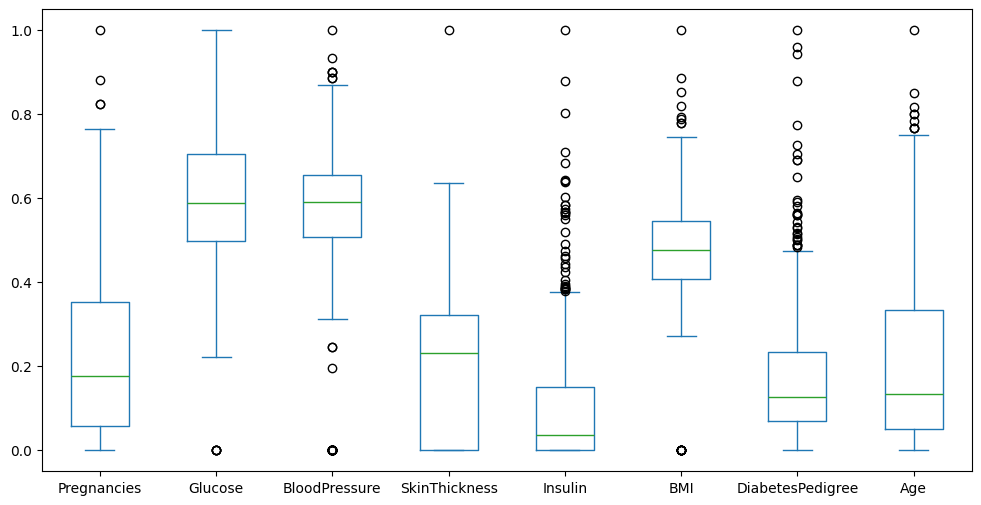

In [33]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [34]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


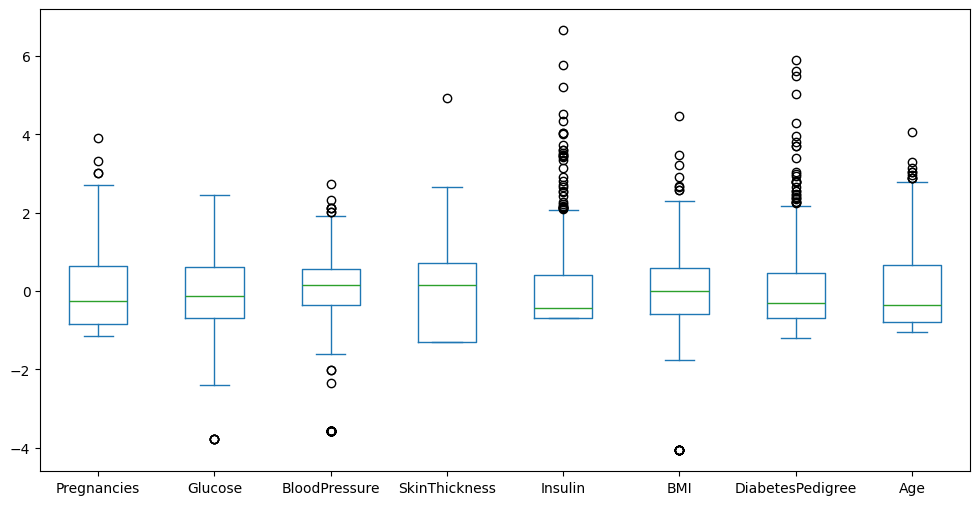

In [35]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [36]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [37]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[  8.     84.     74.     31.      0.     38.3     0.457  39.   ]
 [  2.    144.     58.     33.    135.     31.6     0.422  25.   ]
 [  1.     96.     64.     27.     87.     33.2     0.289  21.   ]
 [  0.     91.     80.      0.      0.     32.4     0.601  27.   ]
 [  0.     97.     64.     36.    100.     36.8     0.6    25.   ]]
Output = [0. 1. 0. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[4.00e+00 1.34e+02 7.20e+01 0.00e+00 0.00e+00 2.38e+01 2.77e-01 6.00e+01]
 [3.00e+00 1.11e+02 9.00e+01 1.20e+01 7.80e+01 2.84e+01 4.95e-01 2.90e+01]
 [1.20e+01 1.21e+02 7.80e+01 1.70e+01 0.00e+00 2.65e+01 2.59e-01 6.20e+01]
 [4.00e+00 1.14e+02 6.40e+01 0.00e+00 0.00e+00 2.89e+01 1.26e-01 2.40e+01]
 [2.00e+00 9.90e+01 7.00e+01 1.60e+01 4.40e+01 2.04e+01 2.35e-01 2.70e+01]]
Output = [1. 0. 0. 0. 0.]


In [39]:
# Lưu thông tin
save_dir = "exps/iris"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)

['df_clean.xlsx', 'data.npz', 'class_encoder.joblib']

In [40]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [41]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
joblib.load(f'{save_dir}/class_encoder.joblib').classes_

array([0, 1])

# Kết thúc